In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [124]:
df = pd.read_csv('Cuisine_rating.csv')

In [125]:
df.head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes


In [126]:
df.rename(columns={'Often A S':'Visits Often'}, inplace=True)

In [127]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

In [128]:
df['Location'].replace('Market City, MY','Market City, NY', inplace=True)
df['Location'].replace('Central Park,ny','Central Park,NY', inplace=True)

/var/folders/gw/qrkv_7953232yz0tyq04pl400000gn/T/ipykernel_2331/4245039363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].replace('Market City, MY','Market City, NY', inplace=True)
/var/folders/gw/qrkv_7953232yz0tyq04pl400000gn/T/ipykernel_2331/4245039363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [129]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Cedar Hill, NY'], dtype=object)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Visits Often    200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


EDA

In [131]:
def print_numbers(ax):
    for bars in ax.containers:
        ax.bar_label(bars)

In [132]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Visits Often'],
      dtype='object')

Univariate Analysis

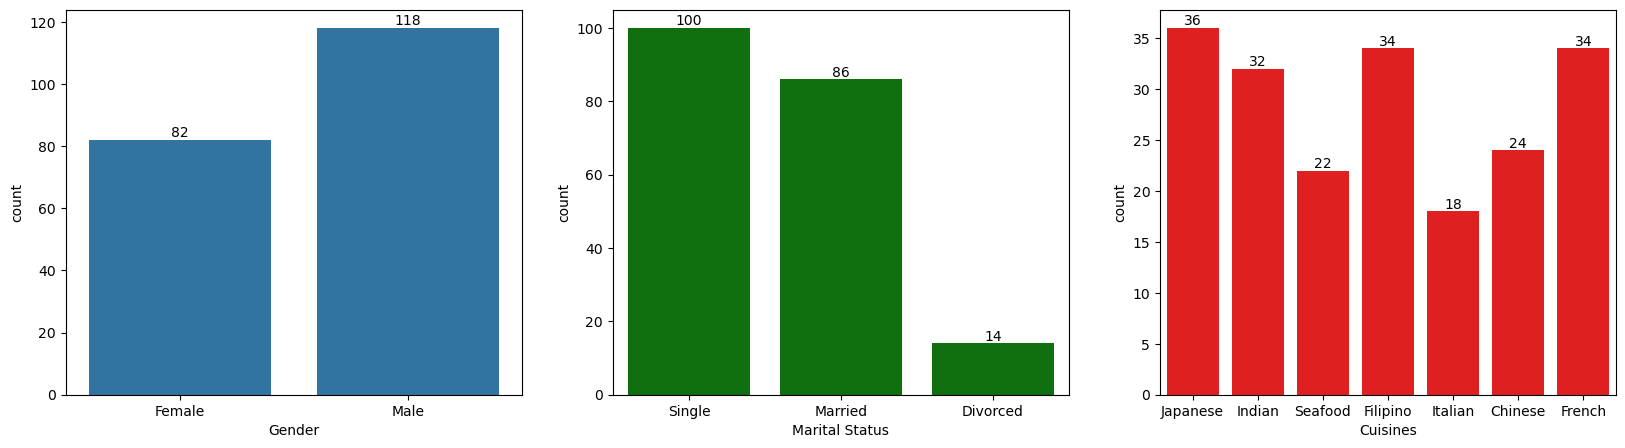

In [133]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
ax = sns.countplot(x='Gender', data=df)
print_numbers(ax)

plt.subplot(1,3,2)
ax = sns.countplot(x='Marital Status', data=df, color='green')
print_numbers(ax)

plt.subplot(1,3,3)
ax = sns.countplot(x='Cuisines', data=df, color='red')
print_numbers(ax)

plt.show()

Bivariate Analysis

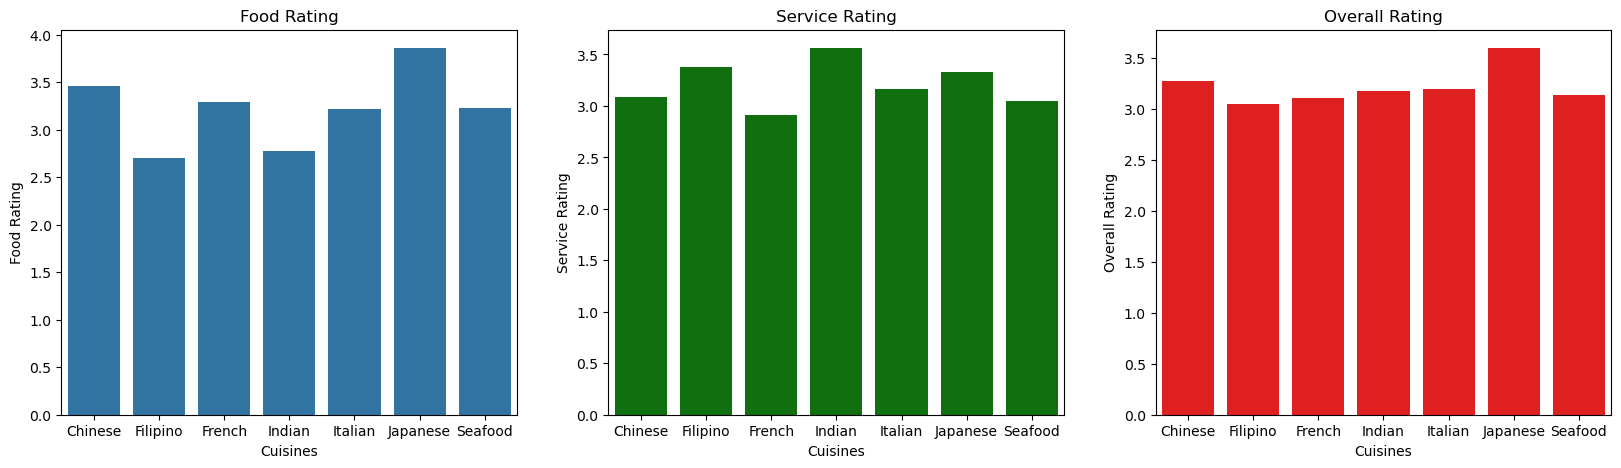

In [134]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
df_rating_by_cuisine = df.groupby('Cuisines', as_index=False)['Food Rating'].mean()
ax = sns.barplot(x='Cuisines', y='Food Rating', data = df_rating_by_cuisine).set_title("Food Rating") 

plt.subplot(1,3,2)
df_rating_by_cuisine = df.groupby('Cuisines', as_index=False)['Service Rating'].mean()
ax = sns.barplot(x='Cuisines', y='Service Rating', data = df_rating_by_cuisine, color='green').set_title("Service Rating") 

plt.subplot(1,3,3)
df_rating_by_cuisine = df.groupby('Cuisines', as_index=False)['Overall Rating'].mean()
ax = sns.barplot(x='Cuisines', y='Overall Rating', data = df_rating_by_cuisine, color='red').set_title("Overall Rating") 

plt.show()

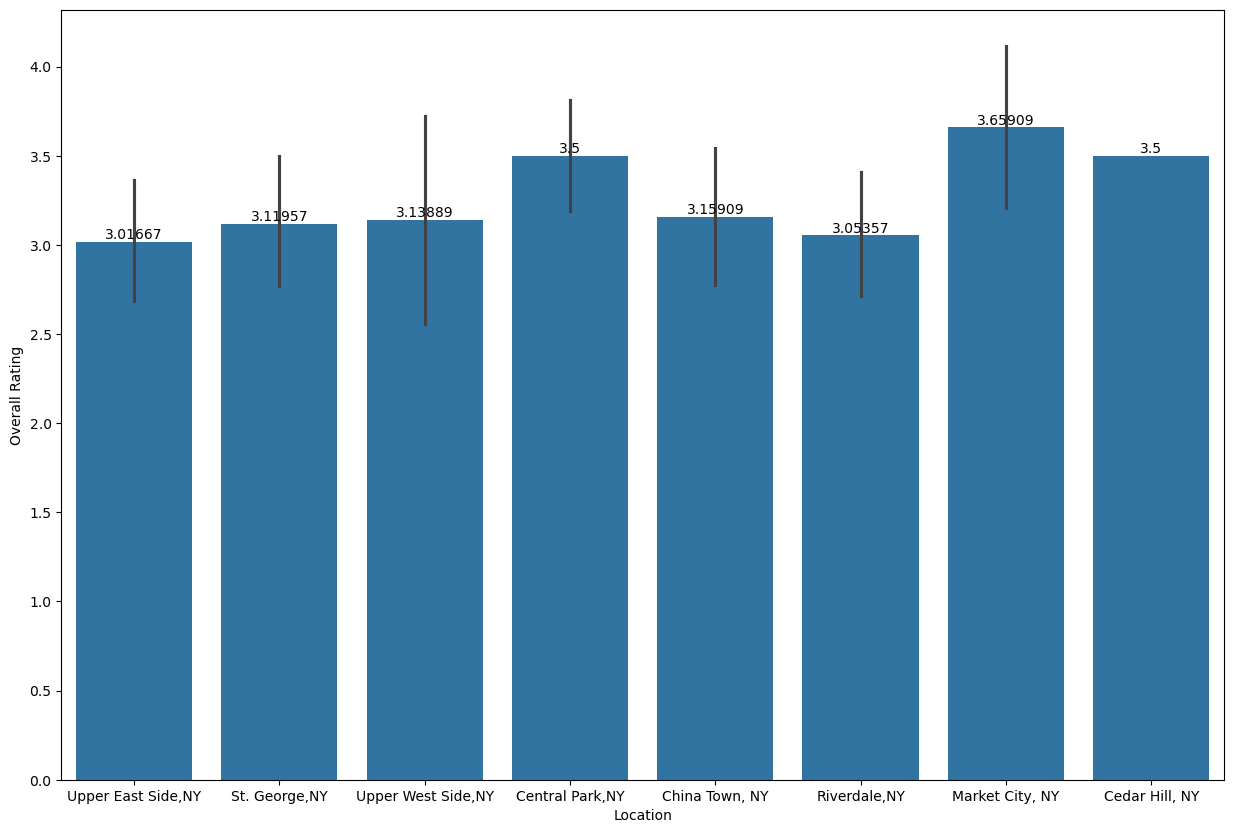

In [135]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Location', y='Overall Rating', data=df)
print_numbers(ax)

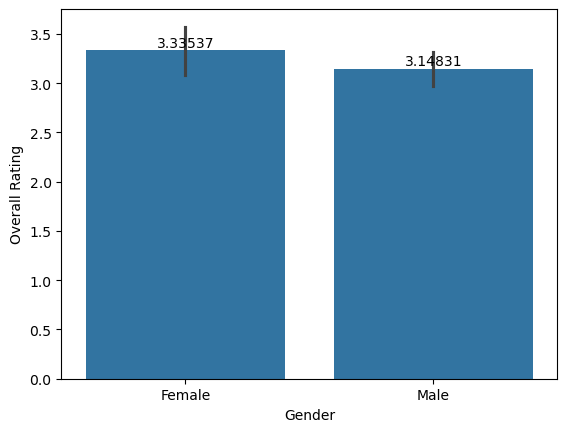

In [136]:
ax = sns.barplot(x='Gender', y='Overall Rating', data=df)
print_numbers(ax)

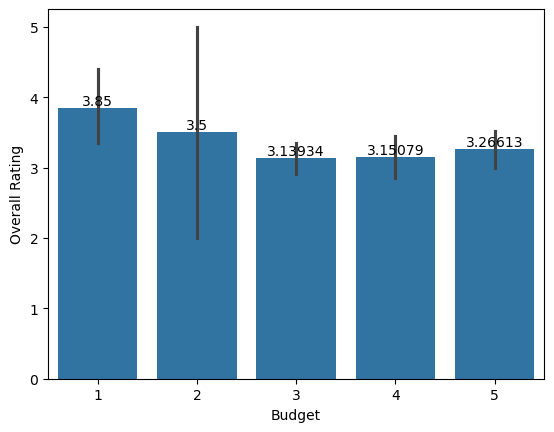

In [137]:
ax = sns.barplot(x='Budget', y='Overall Rating', data=df)
print_numbers(ax)

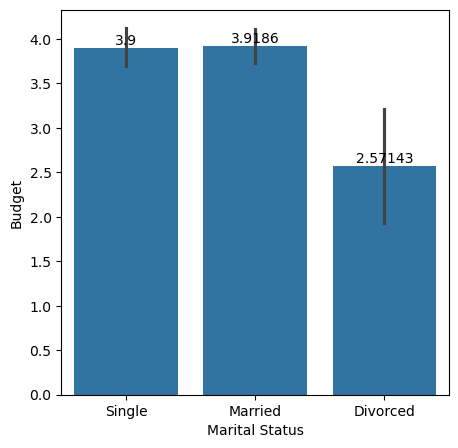

In [138]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Marital Status', y='Budget', data=df)
print_numbers(ax)

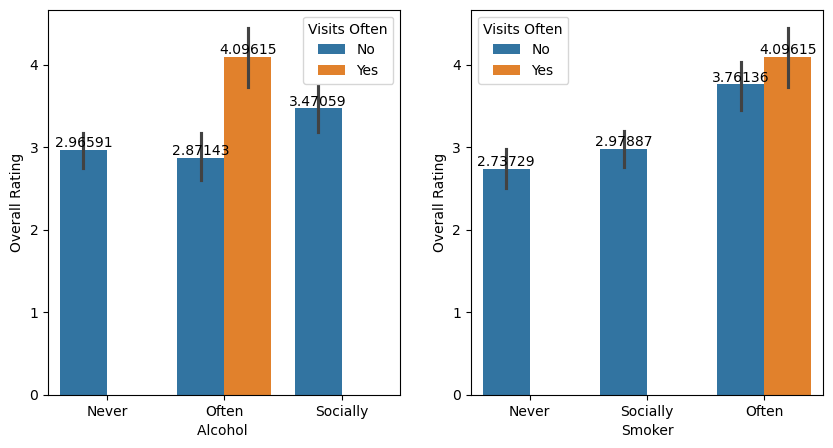

In [139]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.barplot(x='Alcohol ', y='Overall Rating', hue='Visits Often' ,data=df)
print_numbers(ax)

plt.subplot(1,2,2)
ax = sns.barplot(x='Smoker', y='Overall Rating', hue='Visits Often' ,data=df)
print_numbers(ax)

plt.show()

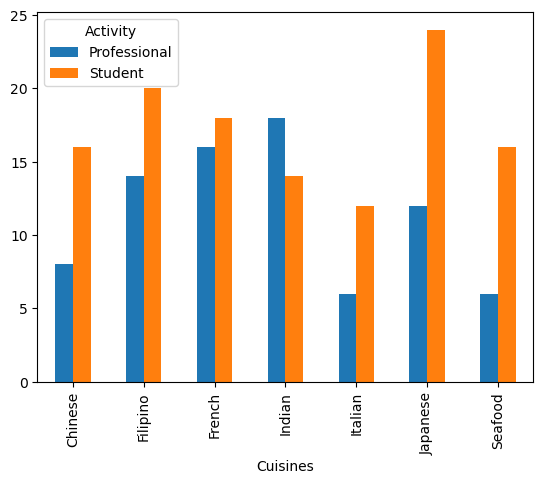

In [140]:
df_visits_often_gender = df.groupby('Cuisines')['Activity'].value_counts().unstack()
df_visits_often_gender.plot(kind='bar')
plt.show()

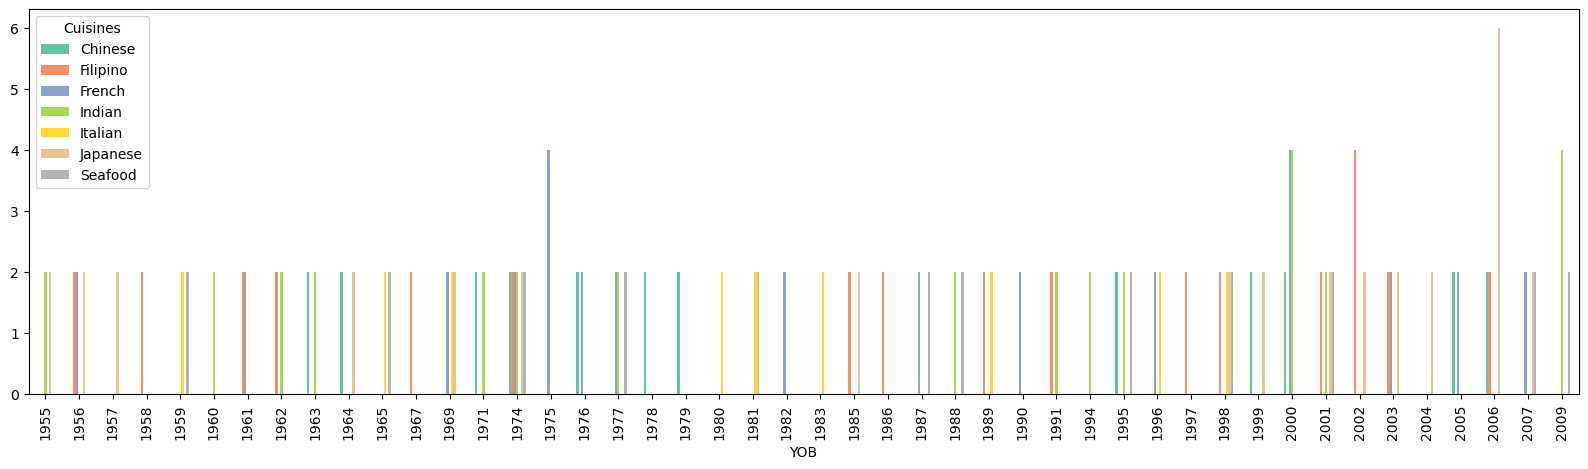

In [164]:
df_visits_often_gender = df.groupby('YOB')['Cuisines'].value_counts().unstack()
fig, ax = plt.subplots(figsize=(20, 5))
df_visits_often_gender.plot(kind='bar', ax=ax, colormap=colormaps['Set2'])
plt.show()